In [98]:
import numpy as np
import pandas as pd
import spacy
import pinyin.cedict
import re
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from re import compile as _Re
import matplotlib.pyplot as plt

In [ ]:
nlp=spacy.load('en_core_web_sm')

In [2]:
character_splitter = _Re( '(?s)((?:[\ud800-\udbff][\udc00-\udfff])|.)' ).split

def split_characters(text):
    return [ chr for chr in character_splitter( text ) if chr]

In [3]:
def remove_chinese_symbol(text):
    text_split=split_characters(text)
    for txt in text_split:
        if txt > u'\u4e00' and txt < u'\u9fff':
            text=''
    return text

In [79]:
input_text= u"办理美国加州州立大学圣贝纳迪诺分校高 this is wonderfull 加州州立大学圣贝纳迪诺分校学历学位认证"
def split_and_translate_text(input_text):
    input_text=input_text.split()
    chinese_text=[]
    for text in input_text:
        if text > u'\u4e00' and text < u'\u9fff':
            chinese_text.append(text)
            input_text.remove(text)
    for text in chinese_text:
        dict_items=dict(pinyin.cedict.all_phrase_translations(text)).items()
        list_of_translations=[v for k,v in dict_items]
        translations_list=[]
        for lists in list_of_translations:
            for translations in lists:
                translations_list.append(translations)
        input_text.append(' '.join([remove_chinese_symbol(text.split('(')[0]) for text in translations_list]))
        return ' '.join(input_text)

In [67]:
def clean_data(text_):
    """
    A function that does the following to the text data:
    1) lower the text
    2) Removes entities, punctuation, extra spaces, stop words.
    3) Returns the lemmatized version of the word
    """
    doc=nlp(text_.lower())
    doc_ents=[word.text for word in doc.ents]
    doc=[token for token in doc if token.is_space==False and token.is_punct==False and token.is_stop==False]
    return re.sub('[\d+]','',' '.join([token.lemma_ for token in doc if token.text not in doc_ents]))

In [85]:
d={1:'麻烦你了 Where is the bathroom?', 2: '请问 What is your name? 如果您不想回答，就不必回答', 3:'他们能找到吗 a new king without 争议?',4:'他们的阴谋因为国王的一些值得信赖的朋友而失败',5:'They started plotting 反对他', 6:'This is a 欺诈交易', 7:'这是真实的 transaction', 8:'我会 never 作弊 my bank.', 9:'他们说有时候 it is best 老实说', 10:'I am 一个诚实的人. 它可以让我 into trouble sometimes'}
df=pd.DataFrame(d.values(),index=d.keys(),columns=['text'])

In [86]:
df['text']=df['text'].apply(lambda x:split_and_translate_text(x))
df['text']=df['text'].apply(lambda x:clean_data(x))

In [88]:
CV=CountVectorizer(max_df=.95,min_df=2)
dtm=CV.fit_transform(df['text'])

In [92]:
LDA= LatentDirichletAllocation(n_components=5,random_state=42)
LDA_transformed=LDA.fit_transform(dtm)
list_of_topic_words=[[CV.get_feature_names()[index] for index in topic.argsort()[-15:]] for i,topic in enumerate(LDA.components_)]

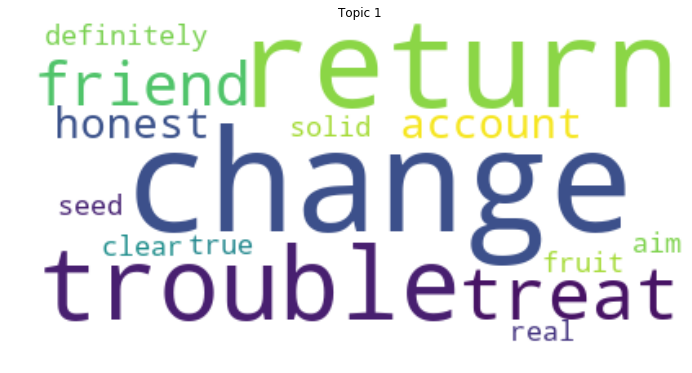

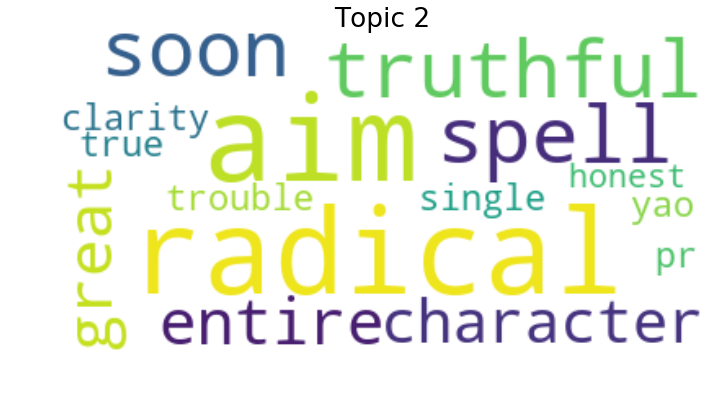

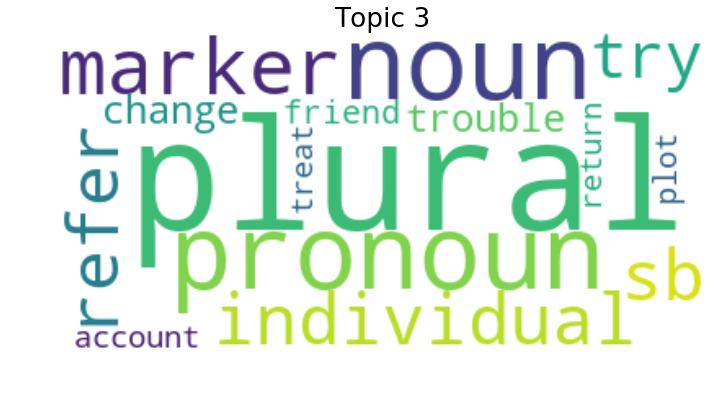

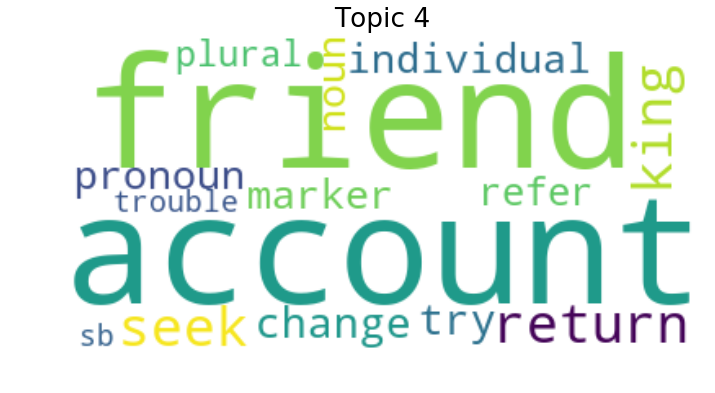

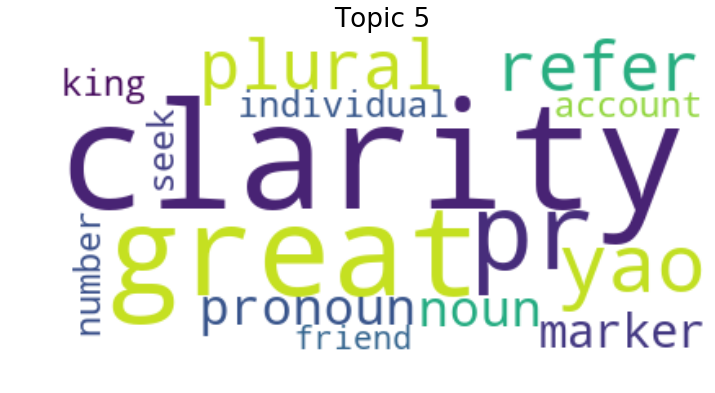

In [99]:
list_of_topic_words1=[' '.join(cluster) for cluster in list_of_topic_words]


wc = [WordCloud(background_color="white").generate(topic) for topic in list_of_topic_words1]
for index,image in enumerate(wc):
    fig=plt.figure(figsize=(12,6))
    plt.imshow(image,interpolation='bilinear')
    plt.title(f'Topic {index+1}')
    plt.axis('off')
    plt.show()
    plt.rcParams.update({'font.size': 22})
    print('\n')
    print('\n')
    print('\n')